In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
df_sensor_geometry = pd.read_csv('data/dataset/sensor_geometry.csv')

In [4]:
df_sensor_geometry

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95
...,...,...,...,...
5155,5155,-10.97,6.72,-472.39
5156,5156,-10.97,6.72,-479.39
5157,5157,-10.97,6.72,-486.40
5158,5158,-10.97,6.72,-493.41


Keep only unique XY

In [5]:
df_sensor_geometry_xy = df_sensor_geometry.sort_values('sensor_id').drop_duplicates(subset=['x', 'y'], keep='last')

### Get `sensor_id`s

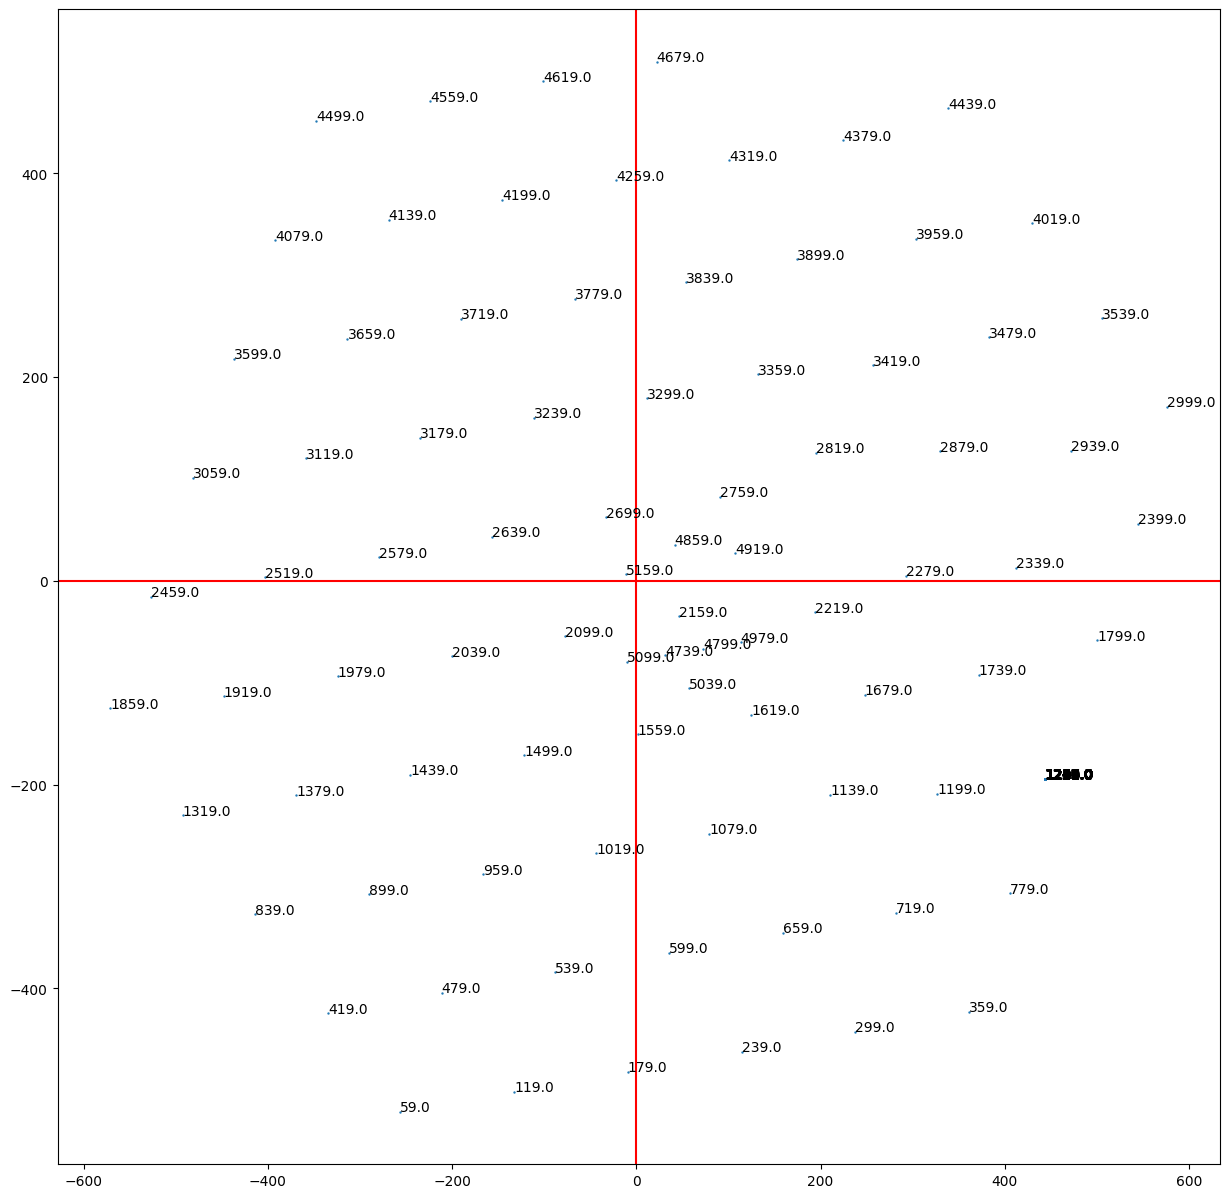

In [14]:
plt.figure(figsize=(15, 15))
plt.scatter(df_sensor_geometry_xy['x'], df_sensor_geometry_xy['y'], s=0.5)
for i in range(len(df_sensor_geometry_xy)):
    row = df_sensor_geometry_xy.iloc[i]
    text = str(row['sensor_id'])
    x, y = row['x'], row['y']
    plt.annotate(text, (x, y + 0.2))
plt.axhline(0, color='red')
plt.axvline(0, color='red')

### Get good line to mirror

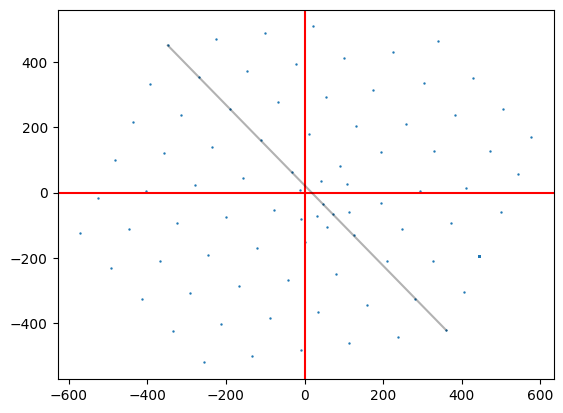

In [7]:
base_0, base_1 = \
    df_sensor_geometry[df_sensor_geometry['sensor_id'] == 4499].iloc[0][['x', 'y']], \
    df_sensor_geometry[df_sensor_geometry['sensor_id'] == 359].iloc[0][['x', 'y']]

plt.scatter(df_sensor_geometry_xy['x'], df_sensor_geometry_xy['y'], s=0.5)
plt.axhline(0, color='red')
plt.axvline(0, color='red')

line = Line2D([base_0[0], base_1[0]], [base_0[1], base_1[1]], color='red')
plt.plot(*line.get_data(), alpha=0.3, color='k')

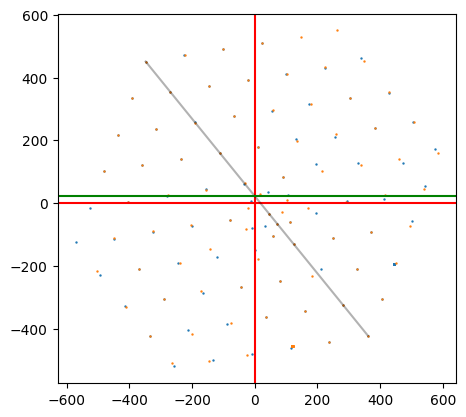

In [8]:
import numpy as np

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy


def reflect(x, y, k, b):
    # Get angle
    alpha = np.pi / 2 + np.arctan(k)

    # Shift to origin
    x_shift, y_shift = b * np.cos(np.pi / 2 - alpha) * np.cos(alpha), b * np.cos(np.pi / 2 - alpha) * np.sin(alpha)
    x, y = x - x_shift, y - y_shift

    # Rotate
    x, y = rotate((0, 0), (x, y), -alpha)

    # Reflect
    x = -x

    # Rotate back
    x, y = rotate((0, 0), (x, y), alpha)

    # Shift back
    x, y = x + x_shift, y + y_shift

    return x, y

k = (base_1[1] - base_0[1]) / (base_1[0] - base_0[0])
b = base_0[1] - base_0[0] * k

plt.scatter(df_sensor_geometry_xy['x'], df_sensor_geometry_xy['y'], s=0.5)
plt.axhline(0, color='red')
plt.axvline(0, color='red')

line = Line2D([base_0[0], base_1[0]], [base_0[1], base_1[1]], color='red')
plt.plot(*line.get_data(), alpha=0.3, color='k')

df_sensor_geometry_xy['x_reflected'], df_sensor_geometry_xy['y_reflected'] = \
    reflect(df_sensor_geometry_xy['x'], df_sensor_geometry_xy['y'], k, b)

plt.scatter(df_sensor_geometry_xy['x_reflected'], df_sensor_geometry_xy['y_reflected'], s=0.5)
plt.axhline(b, color='green')
plt.gca().set_aspect('equal', adjustable='box')

In [9]:
k, b

(-1.2334245570477371, 22.436265094233192)

In [10]:
np.arctan(k)

-0.8895342838248823

In [11]:
np.pi / 2 + np.arctan(k)

0.6812620429700142

# Get all the anisotropy directions

-1.2334245570477371 22.436265094233192
-6.279196009389672 -539.0690595657277
2.6169062228573026 451.64020341262506
0.8034497666860473 4.924340534013169
0.17294482605805447 -144.9967793042322
-0.38345223229188563 -217.53744909187571


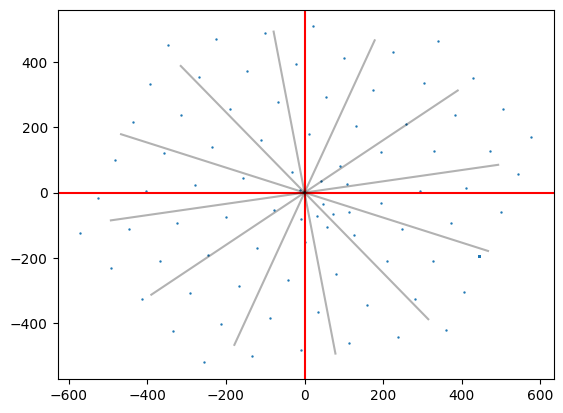

In [24]:
base_sensor_ids = [
    [4499, 359],
    [4199, 179],
    [4679, 419],
    [3419, 839],
    [1799, 1319],
    [719, 2459],
]

plt.scatter(df_sensor_geometry_xy['x'], df_sensor_geometry_xy['y'], s=0.5)
plt.axhline(0, color='red')
plt.axvline(0, color='red')

for base_0_sensor_id, base_1_sensor_id in base_sensor_ids:
    base_0, base_1 = \
    df_sensor_geometry[df_sensor_geometry['sensor_id'] == base_0_sensor_id].iloc[0][['x', 'y']], \
    df_sensor_geometry[df_sensor_geometry['sensor_id'] == base_1_sensor_id].iloc[0][['x', 'y']]

    k = (base_1[1] - base_0[1]) / (base_1[0] - base_0[0])
    b = base_0[1] - base_0[0] * k

    x, y = base_1[0] - base_0[0], base_1[1] - base_0[1]
    norm = np.sqrt(x ** 2 + y ** 2)
    x, y = x / norm, y / norm
    x, y = x * 500, y * 500
    line = Line2D([-x, x], [-y, y], color='red')
    plt.plot(*line.get_data(), alpha=0.3, color='k')

    print(k, b)